In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

In [2]:
NUM_CLASSES=4
NUM_FEATURES = 2
RANDOM_SEED=42

#create multiclass data
X_blob, y_blob= make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, #randomness,
                           random_state=RANDOM_SEED)

In [3]:
#turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.LongTensor)

In [31]:
X_blob[:20],y_blob[:20]
# len(X_blob)
# len(y_blob)

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478],
         [ 5.1463,  1.3554],
         [-5.9865,  7.2325],
         [-2.2106,  8.1140],
         [-5.5022, -9.2359],
         [-5.9605, -8.4602],
         [-5.0600, -6.6675],
         [-3.6841,  8.5312],
         [-1.6886,  8.7110],
         [-1.0465,  8.7937],
         [ 5.1303,  1.6445]]),
 tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1]))

In [5]:
X_blob_train,X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

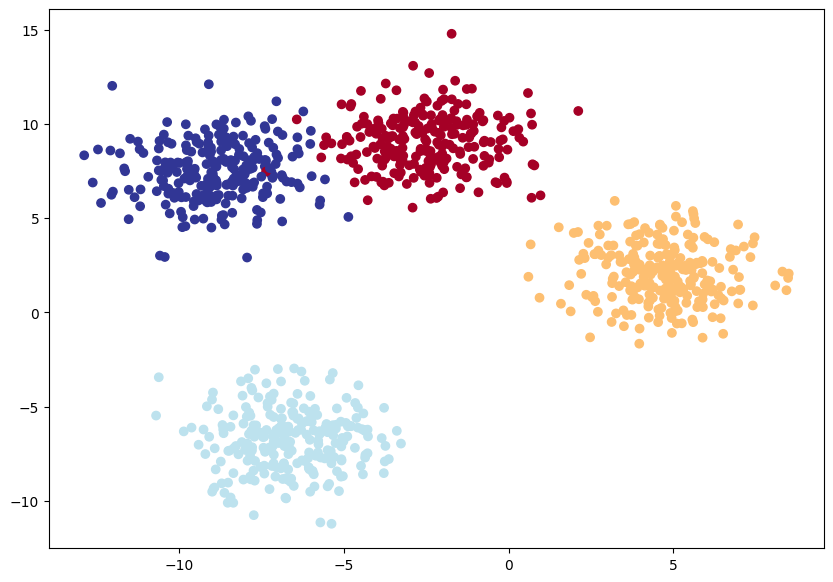

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0],X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [7]:
#building multi class classification

In [8]:
class BlobModel(nn.Module):
    def __init__(self,input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack=nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
#             nn.ReLU(),    
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
#             nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features),
        )
     
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model_4=BlobModel(input_features=NUM_FEATURES,
                  output_features=NUM_CLASSES,
                 hidden_units=8)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
#loss function and optimizer
#crossentropy loss
loss_fn=nn.CrossEntropyLoss()

#creating optimizer
optimizer= torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

In [10]:
# #getting predition probablities
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_preds[:10]

NameError: name 'y_preds' is not defined

In [11]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [12]:
#covert our models logits outputs to prediction probablities

In [13]:
y_pred_probs= torch.softmax(y_logits,dim=1)
print(y_pred_probs[:5])
print(y_logits[:5])

tensor([[0.1016, 0.5530, 0.1570, 0.1883],
        [0.0124, 0.2724, 0.5186, 0.1966],
        [0.5996, 0.0935, 0.0816, 0.2254],
        [0.2265, 0.4331, 0.1256, 0.2148],
        [0.0111, 0.4972, 0.3456, 0.1460]])
tensor([[-0.7950,  0.8992, -0.3596, -0.1781],
        [-2.0763,  1.0121,  1.6559,  0.6857],
        [ 1.1681, -0.6907, -0.8265,  0.1896],
        [-0.1495,  0.4986, -0.7390, -0.2029],
        [-2.2975,  1.5005,  1.1366,  0.2753]])


In [14]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [15]:
#convert predition probablities
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0,
        0, 3, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1,
        1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 2,
        2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2,
        1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 3,
        0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 2, 2, 2, 3, 0, 1, 2, 3, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2,
        0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2,
        1, 2, 0, 1, 2, 1, 0, 1])

In [16]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [17]:
#calc accuracy
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [18]:
#training loop
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
    model_4.train()
    y_logits=model_4(X_blob_train)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    loss= loss_fn(y_logits,y_blob_train.type(torch.LongTensor))
    acc=accuracy_fn(y_true=y_blob_train,
                   y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #testing
    model_4.eval()
    with torch.inference_mode():
        test_logits= model_4(X_blob_test)
        test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc= accuracy_fn(y_true=y_blob_test,
                              y_pred=test_preds)
        
    #print 
    #print out whats happening
    if epoch%10==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        

Epoch: 0 | loss:  2.27005, Acc:25.00% | Test loss: 0.82000, Test acc: 49.00%
Epoch: 10 | loss:  0.17160, Acc:98.00% | Test loss: 0.14409, Test acc: 99.00%
Epoch: 20 | loss:  0.08474, Acc:99.25% | Test loss: 0.07685, Test acc: 99.50%
Epoch: 30 | loss:  0.06130, Acc:99.12% | Test loss: 0.05392, Test acc: 99.50%
Epoch: 40 | loss:  0.05007, Acc:99.12% | Test loss: 0.04254, Test acc: 99.50%
Epoch: 50 | loss:  0.04361, Acc:99.12% | Test loss: 0.03584, Test acc: 99.50%
Epoch: 60 | loss:  0.03947, Acc:99.12% | Test loss: 0.03147, Test acc: 99.50%
Epoch: 70 | loss:  0.03661, Acc:99.12% | Test loss: 0.02840, Test acc: 99.50%
Epoch: 80 | loss:  0.03454, Acc:99.12% | Test loss: 0.02613, Test acc: 99.50%
Epoch: 90 | loss:  0.03298, Acc:99.12% | Test loss: 0.02439, Test acc: 99.50%


In [19]:
import requests
from pathlib import Path

#download helper function
if Path("helper_functions.py").is_file():
    print('already downloaded')
else:
    print('downloading....')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


already downloaded


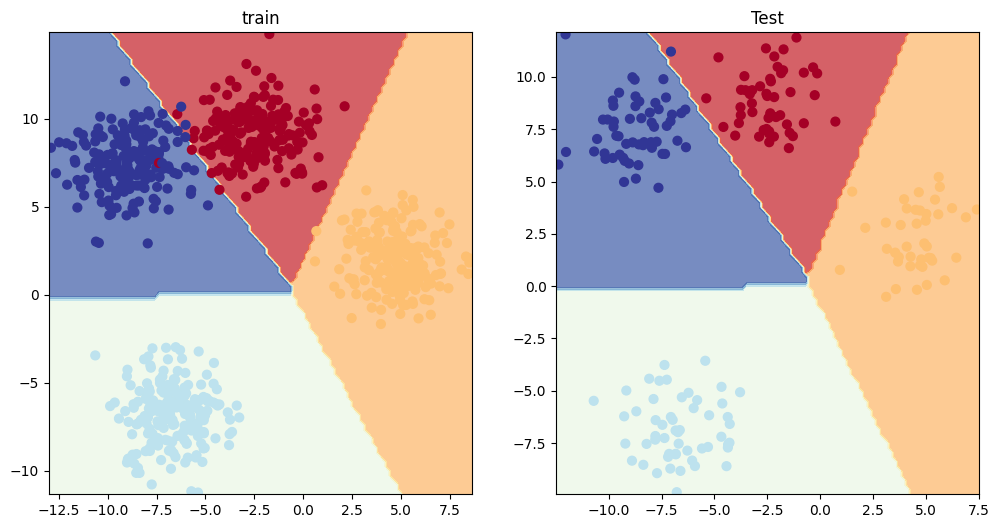

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [21]:
model_4.eval()
with torch.inference_mode():
    y_logits= model_4(X_blob_test)
y_logits[:10]

tensor([[  6.7262,  12.1143, -11.3197,  -6.6470],
        [  2.6751, -12.1744,   0.8936,   8.2393],
        [-11.0290, -14.4148,  15.9474,   7.6659],
        [  2.9531,   8.8842,  -6.3163,  -5.1396],
        [  9.9047,   4.7244, -12.2123,  -1.4737],
        [  2.7578, -15.2992,   1.8339,  10.2426],
        [-10.8255, -11.0164,  14.6182,   5.5300],
        [  7.7550,   0.2439,  -8.4942,   1.0676],
        [-12.1847, -20.1269,  19.0317,  11.1371],
        [  8.3815,   1.8710,  -9.6834,   0.1222]])

In [22]:
#go from logits to prediction probablities

In [23]:
y_pred_probs= torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[4.5497e-03, 9.9545e-01, 6.6183e-11, 7.0808e-09],
        [3.8156e-03, 1.3569e-09, 6.4250e-04, 9.9554e-01],
        [1.9240e-12, 6.5126e-14, 9.9975e-01, 2.5309e-04],
        [2.6485e-03, 9.9735e-01, 2.4968e-07, 8.0987e-07],
        [9.9439e-01, 5.5949e-03, 2.4676e-10, 1.1376e-05],
        [5.6111e-04, 8.0722e-12, 2.2274e-04, 9.9922e-01],
        [8.9105e-12, 7.3619e-12, 9.9989e-01, 1.1298e-04],
        [9.9821e-01, 5.4599e-04, 8.7553e-08, 1.2443e-03],
        [2.7716e-14, 9.8512e-18, 9.9963e-01, 3.7259e-04],
        [9.9826e-01, 1.4852e-03, 1.4249e-08, 2.5839e-04]])

In [24]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [25]:
#going from pred probs to pred labels
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

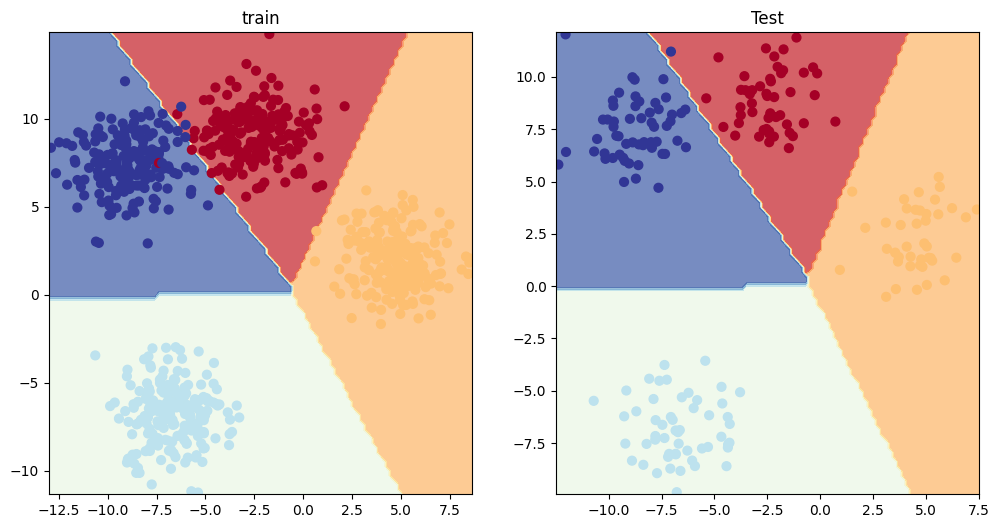

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [27]:
#classification metrics

In [28]:
# accuracy: out of 100 how many are right
# predicision
#recall
#f1 score
#confusion matrix
#classification

In [30]:
from torchmetrics import Accuracy
torchmetric_accuracy= Accuracy()
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)

#accuracy of 99.5%